### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Driver Dataset
Source: https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv

In [2]:
drivers_data = pd.read_csv('datasets/driver_dataset.csv', sep='\t')

drivers_data.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [3]:
drivers_data.shape

(4000, 3)

In [4]:
#Shuffle the data hodling real values
drivers_data = drivers_data.sample(frac=1)

##### Dropping the ID column

In [5]:
drivers_data.drop('Driver_ID', axis=1, inplace=True)

drivers_data.sample(10)

,Distance_Feature,Speeding_Feature
1503,43.96,5.0
465,55.12,34.0
3809,207.01,18.0
1456,42.01,4.0
1942,47.01,6.0
1914,40.29,7.0
2693,48.03,5.0
138,52.37,6.0
2467,52.03,4.0
3085,56.52,7.0


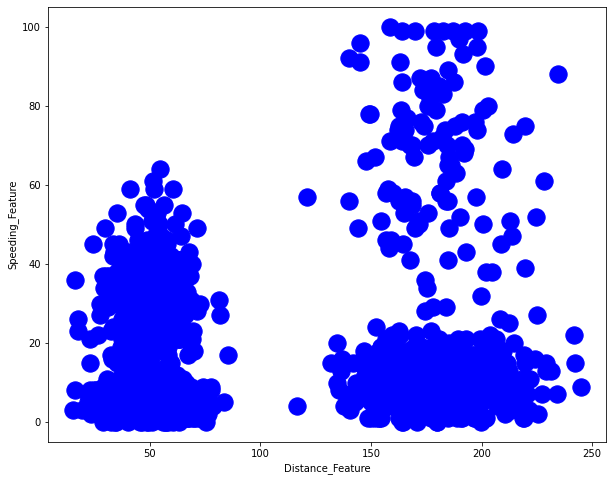

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(drivers_data['Distance_Feature'], 
            drivers_data['Speeding_Feature'], 
            s = 300, 
            c='blue')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

### Kmeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [7]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

## For recording start with 4, then 3 then 2 and change this code and hit shift-enter
# kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
# kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

In [8]:
kmeans_model.labels_[::40]

array([0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 3, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 3, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2], dtype=int32)

In [9]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3], dtype=int32)

In [10]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([47.04,  7.  ]), 2),
 (array([31.24,  1.  ]), 2),
 (array([41.22,  8.  ]), 2),
 (array([34.03,  5.  ]), 2),
 (array([62.89,  5.  ]), 2),
 (array([55.77,  5.  ]), 2),
 (array([40.9,  5. ]), 2),
 (array([45.97,  4.  ]), 2),
 (array([54.32,  3.  ]), 2),
 (array([53.,  4.]), 2)]

In [11]:
centroids = kmeans_model.cluster_centers_

centroids

array([[ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154]])

##### plotting centroids along with data points

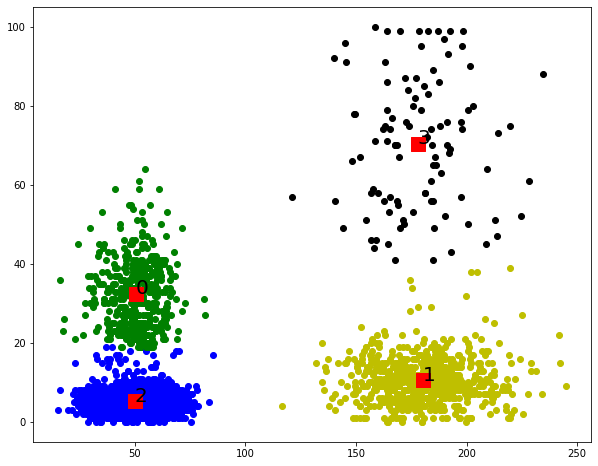

In [12]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

##### with no of clusters = 4 silhouette score decreased

In [13]:
from sklearn.metrics import silhouette_score

print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette score:  0.5911323766293183


In [14]:
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

## For recording start with 4, then 3 then 2 and change this code and hit shift-enter
kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
# kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

In [15]:
kmeans_model.labels_[::40]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [16]:
np.unique(kmeans_model.labels_)

array([0, 1, 2], dtype=int32)

In [17]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([47.04,  7.  ]), 0),
 (array([31.24,  1.  ]), 0),
 (array([41.22,  8.  ]), 0),
 (array([34.03,  5.  ]), 0),
 (array([62.89,  5.  ]), 0),
 (array([55.77,  5.  ]), 0),
 (array([40.9,  5. ]), 0),
 (array([45.97,  4.  ]), 0),
 (array([54.32,  3.  ]), 0),
 (array([53.,  4.]), 0)]

In [18]:
centroids = kmeans_model.cluster_centers_

centroids

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

##### plotting centroids along with data points

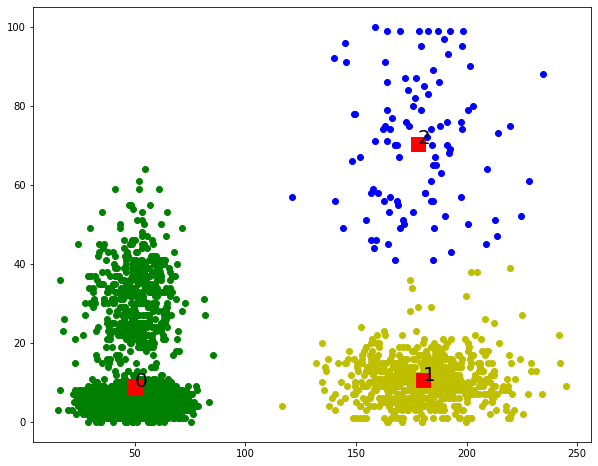

In [19]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

##### with no of clusters = 3 silhouette score increased when compared to clusters = 4

In [21]:
from sklearn.metrics import silhouette_score

print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette score:  0.8231396834167265


In [22]:
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

## For recording start with 4, then 3 then 2 and change this code and hit shift-enter
#kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

In [23]:
kmeans_model.labels_[::40]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [24]:
np.unique(kmeans_model.labels_)

array([0, 1], dtype=int32)

In [25]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([47.04,  7.  ]), 1),
 (array([31.24,  1.  ]), 1),
 (array([41.22,  8.  ]), 1),
 (array([34.03,  5.  ]), 1),
 (array([62.89,  5.  ]), 1),
 (array([55.77,  5.  ]), 1),
 (array([40.9,  5. ]), 1),
 (array([45.97,  4.  ]), 1),
 (array([54.32,  3.  ]), 1),
 (array([53.,  4.]), 1)]

In [26]:
centroids = kmeans_model.cluster_centers_

centroids

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

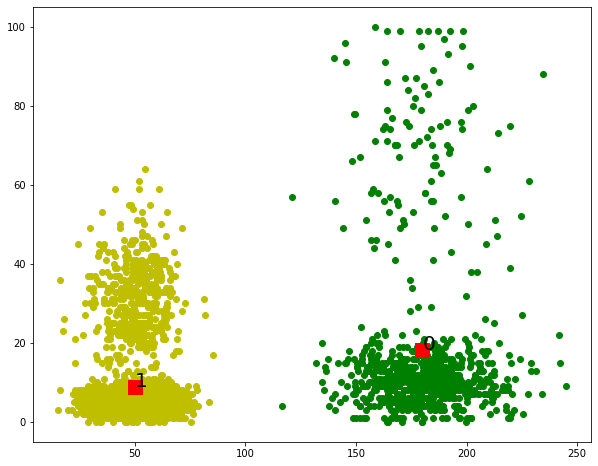

In [27]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

In [28]:
print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette score:  0.8490223286225531
